In [1]:
import numpy as np
import matplotlib.pyplot as plt
import RTEpopulation as RTEpop
import copy

%matplotlib inline

In [2]:
def replicate_runs(testpop, generations=100, max_step_size=.1, replica_number=15):
    runs = []
    for i in range(replica_number):
        runs.append(run_sim(copy.deepcopy(testpop), generations, max_step_size))
    return runs

def run_sim(testpop, generations=100, max_step_size=.1):
    summary = {'mean_active': [], 'mean_inactive': [], 'mean_compensating': [],
                     'mean_fitness': [], 'mean_growth_rate': [], 'pop_size': []}
    steps_per_gen = int(1 / max_step_size)
    max_step_size = 1/steps_per_gen
    for i in range(generations):
        for j in range(steps_per_gen):
            testpop.update(max_step_size)
        summary['mean_active'].append(testpop.mean_active_rtes())
        summary['mean_inactive'].append(testpop.mean_inactive_rtes())
        summary['mean_compensating'].append(testpop.mean_compensating_mutations())
        summary['mean_fitness'].append(testpop.mean_fitness())
        summary['mean_growth_rate'].append(testpop.mean_growth_rate())
        summary['pop_size'].append(testpop.pop_size())
    return summary

def test_fitness_function(active, inactive, compensating):
    return -.02 * (active + inactive - compensating)

def test_growth_rate_function(N, t):
    return (1 - N/10**3)

In [3]:
p_full_insert = 10**-3
p_partial_insert = 10**-2
p_deactivate = 10**-4
p_compensate = 0
min_active = 10
min_inactive = 0
min_compensating = 0
pop_size = 1000

IBM_pop = RTEpop.rtePopulationIBM.array_init(pop_size, min_active, min_inactive, min_compensating, test_fitness_function,
                                      test_growth_rate_function, p_full_insert, p_partial_insert, p_deactivate, p_compensate)
array_pop = RTEpop.rtePopulationArray(pop_size, min_active, min_inactive, min_compensating, test_fitness_function,
                                      test_growth_rate_function, p_full_insert, p_partial_insert, p_deactivate, p_compensate)

In [4]:
rn = 3
gen = 1000
IBM_runs = replicate_runs(IBM_pop, generations=gen, replica_number=rn)
array_runs = replicate_runs(array_pop, generations=gen, replica_number=rn)

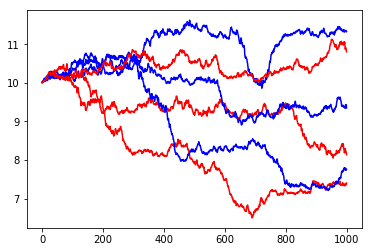

In [5]:
for i in range(rn):
    plt.plot(IBM_runs[i]['mean_active'], 'b')
    plt.plot(array_runs[i]['mean_active'], 'r')

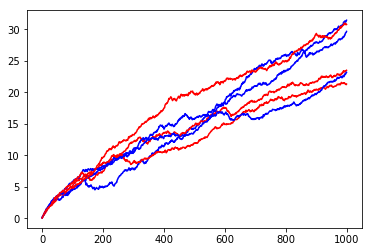

In [6]:
for i in range(rn):
    plt.plot(IBM_runs[i]['mean_inactive'], 'b')
    plt.plot(array_runs[i]['mean_inactive'], 'r')

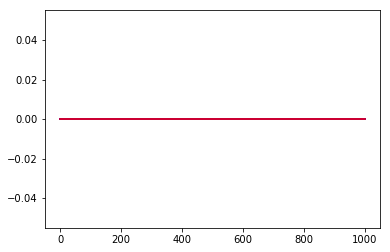

In [7]:
for i in range(rn):
    plt.plot(IBM_runs[i]['mean_compensating'], 'b')
    plt.plot(array_runs[i]['mean_compensating'], 'r')

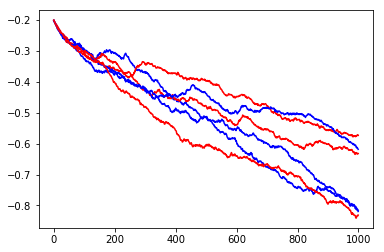

In [8]:
for i in range(rn):
    plt.plot(IBM_runs[i]['mean_fitness'], 'b')
    plt.plot(array_runs[i]['mean_fitness'], 'r')

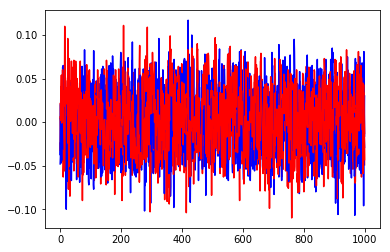

In [9]:
for i in range(rn):
    plt.plot(IBM_runs[i]['mean_growth_rate'], 'b')
    plt.plot(array_runs[i]['mean_growth_rate'], 'r')

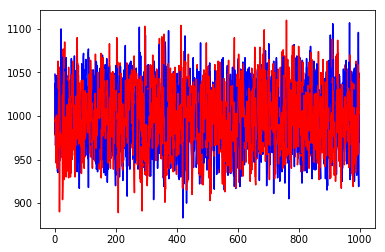

In [10]:
for i in range(rn):
    plt.plot(IBM_runs[i]['pop_size'], 'b')
    plt.plot(array_runs[i]['pop_size'], 'r')